
# **<h3 align="center"> Capstone Project</h3>**
## **<h3 align="center">Series/ Tv Show - MetaData</h3>**
**Group members:**<br>
Alexandra Pinto - 20211599@novaims.unl.pt - 20211599<br>
Ilona Nacu - 20211602@novaims.unl.pt - 20211602<br>
Francisco Farinha - 20211550@novaims.unl.pt - 20211550<br>
João Barradas - 20211590@novaims.unl.pt - 20211590<br>
Rafael Proença  - 2021681@novaims.unl.pt - 2021681<br>



-----------------------------
## Imports

In [1]:
import pandas as pd
import numpy as np
import os


----------------------------
## Loading the datasets
Now it is time to, through a function, open the csv files. Inside the archive we have different datasets divided by genre. Since our goal is to have a more complete dataset we will join this datasets. All the datasets were provided by Kaggle:
- series_data - https://www.kaggle.com/datasets/harshitshankhdhar/tv-series-dataset (Retrieved at 20 november)
- TV series - https://www.kaggle.com/datasets/muralidharbhusal/50000-imdb-tv-and-web-series (Retrieved at 20 november)
- archive data - https://www.kaggle.com/datasets/suraj520/imdb-tv-series-data/data (Retrieved at 20 november)

In [2]:
# Path to the directory containing CSV files
directory_path = 'Data\\Tv_show_files'

try:
    # Initialize an empty list to store the dataframes
    dfs = []

    # Read 'series_data.csv'
    series_data = pd.read_csv(os.path.join(directory_path, 'series_data.csv'), encoding='utf-8')
    
    # Read 'TV Series.csv'
    series = pd.read_csv(os.path.join(directory_path, 'TV Series.csv'), encoding='utf-8')
    
    # Iterate through CSV files in 'archive' directory
    for file in os.listdir(os.path.join(directory_path, 'archive')):
        if file.endswith('.csv'):
            file_path = os.path.join(directory_path, 'archive', file)
            # Read the CSV file into a dataframe
            df = pd.read_csv(file_path, encoding='utf-8')
            
            # Add a new column with a unique value for each file
            df['UniqueValue'] = os.path.splitext(file)[0]  # Extracts the file name without extension
            
            # Append the dataframe to the list
            dfs.append(df)

    # Concatenate all 'archive' dataframes into a single dataframe
    archive_data = pd.concat(dfs, ignore_index=True)

except FileNotFoundError:
    print("File not found. Please check the file path.")
except Exception as e:
    print(f"An error occurred: {e}")


C:\Users\xandg\AppData\Local\Temp\ipykernel_14168\631337160.py:28: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  archive_data = pd.concat(dfs, ignore_index=True)


In [3]:
print("Series Data:")
series_data.head(3)

Series Data:


,Poster_Link,Series_Title,Runtime_of_Series,Certificate,Runtime_of_Episodes,Genre,IMDB_Rating,Overview,Star1,Star2,Star3,Star4,No_of_Votes
0,https://m.media-amazon.com/images/M/MV5BYTRiND...,Game of Thrones,(2011–2019),A,57 min,"Action, Adventure, Drama",9.3,Nine noble families fight for control over the...,Emilia Clarke,Peter Dinklage,Kit Harington,Lena Headey,1773458
1,https://m.media-amazon.com/images/M/MV5BMjhiMz...,Breaking Bad,(2008–2013),18,49 min,"Crime, Drama, Thriller",9.5,A high school chemistry teacher diagnosed with...,Bryan Cranston,Aaron Paul,Anna Gunn,Betsy Brandt,1468887
2,https://m.media-amazon.com/images/M/MV5BMTc5Zm...,The Walking Dead,(2010– ),18+,44 min,"Drama, Horror, Thriller",8.2,Sheriff Deputy Rick Grimes wakes up from a com...,Andrew Lincoln,Norman Reedus,Melissa McBride,Danai Gurira,854698


In [4]:
print("\nSeries:")
series.head(3)


Series:


,Series Title,Release Year,Runtime,Genre,Rating,Cast,Synopsis
0,Wednesday,(2022– ),45 min,"Comedy, Crime, Fantasy",8.2,"Jenna Ortega, Hunter Doohan, Percy Hynes White...","Follows Wednesday Addams' years as a student, ..."
1,Yellowstone,(2018– ),60 min,"Drama, Western",8.7,"Kevin Costner, Luke Grimes, Kelly Reilly, Wes ...",A ranching family in Montana faces off against...
2,The White Lotus,(2021–2023),60 min,"Comedy, Drama",7.9,"Jennifer Coolidge, Jon Gries, F. Murray Abraha...","Set in a tropical resort, it follows the explo..."


In [5]:
print("\nArchive Data:")
archive_data.head(3)


Archive Data:


,Title,IMDb ID,Release Year,Genre,Cast,Synopsis,Rating,Runtime,Certificate,Number of Votes,Gross Revenue,UniqueValue
0,Spider-Man: Across the Spider-Verse,tt9362722,2023,"Animation, Action, Adventure","Directors:, Joaquim Dos Santos, , Kemp Powers,...","Miles Morales catapults across the Multiverse,...",9.1,140 min,PG,71960,NaN,action_series
1,FUBAR,tt13064902,2023–,"Action, Adventure, Thriller","Stars:, Arnold Schwarzenegger, , Monica Barbar...",A C.I.A. operative on the edge of retirement d...,6.5,NaN,TV-MA,15422,NaN,action_series
2,Barry,tt5348176,2018–2023,"Action, Comedy, Crime","Stars:, Bill Hader, , Stephen Root, , Sarah Go...",A hit man from the Midwest moves to Los Angele...,8.4,30 min,TV-MA,101883,NaN,action_series


There are some features that have different names but they are similar, for that, after merging all the datasets we need to:
- Remove NaN values
- Eliminate duplicates
- Change name variables

------------------------------------------------------------------------------------------------------

> ## Series Data Set - preprocessing

In [6]:
series.head(3)

,Series Title,Release Year,Runtime,Genre,Rating,Cast,Synopsis
0,Wednesday,(2022– ),45 min,"Comedy, Crime, Fantasy",8.2,"Jenna Ortega, Hunter Doohan, Percy Hynes White...","Follows Wednesday Addams' years as a student, ..."
1,Yellowstone,(2018– ),60 min,"Drama, Western",8.7,"Kevin Costner, Luke Grimes, Kelly Reilly, Wes ...",A ranching family in Montana faces off against...
2,The White Lotus,(2021–2023),60 min,"Comedy, Drama",7.9,"Jennifer Coolidge, Jon Gries, F. Murray Abraha...","Set in a tropical resort, it follows the explo..."


In [7]:
series.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Series Title  50000 non-null  object
 1   Release Year  49800 non-null  object
 2   Runtime       50000 non-null  object
 3   Genre         50000 non-null  object
 4   Rating        50000 non-null  object
 5   Cast          49909 non-null  object
 6   Synopsis      50000 non-null  object
dtypes: object(7)
memory usage: 2.7+ MB


We have some missing values. Since we have a lot of data we will delete all those rows that have null values.

In [8]:
series.dropna(inplace=True)


In [9]:
series.info()

<class 'pandas.core.frame.DataFrame'>
Index: 49744 entries, 0 to 49999
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Series Title  49744 non-null  object
 1   Release Year  49744 non-null  object
 2   Runtime       49744 non-null  object
 3   Genre         49744 non-null  object
 4   Rating        49744 non-null  object
 5   Cast          49744 non-null  object
 6   Synopsis      49744 non-null  object
dtypes: object(7)
memory usage: 3.0+ MB


In [10]:
series['Series Title'].describe()

count          49744
unique          9406
top       The Office
freq             804
Name: Series Title, dtype: object

Also it is important that the same features has same name. So we will rename the following features.

In [11]:
series.rename(columns={'Series Title': 'Series_title', 'Release Year': 'Release_year'}, inplace=True)

--------------------------------------------------------------------------------------------------------------------------------

> ## Series_data Data Set - preprocessing

In [12]:
series_data.head(3)

,Poster_Link,Series_Title,Runtime_of_Series,Certificate,Runtime_of_Episodes,Genre,IMDB_Rating,Overview,Star1,Star2,Star3,Star4,No_of_Votes
0,https://m.media-amazon.com/images/M/MV5BYTRiND...,Game of Thrones,(2011–2019),A,57 min,"Action, Adventure, Drama",9.3,Nine noble families fight for control over the...,Emilia Clarke,Peter Dinklage,Kit Harington,Lena Headey,1773458
1,https://m.media-amazon.com/images/M/MV5BMjhiMz...,Breaking Bad,(2008–2013),18,49 min,"Crime, Drama, Thriller",9.5,A high school chemistry teacher diagnosed with...,Bryan Cranston,Aaron Paul,Anna Gunn,Betsy Brandt,1468887
2,https://m.media-amazon.com/images/M/MV5BMTc5Zm...,The Walking Dead,(2010– ),18+,44 min,"Drama, Horror, Thriller",8.2,Sheriff Deputy Rick Grimes wakes up from a com...,Andrew Lincoln,Norman Reedus,Melissa McBride,Danai Gurira,854698


In [13]:
series_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Poster_Link          2000 non-null   object 
 1   Series_Title         2000 non-null   object 
 2   Runtime_of_Series    2000 non-null   object 
 3   Certificate          703 non-null    object 
 4   Runtime_of_Episodes  1957 non-null   object 
 5   Genre                2000 non-null   object 
 6   IMDB_Rating          2000 non-null   float64
 7   Overview             2000 non-null   object 
 8   Star1                2000 non-null   object 
 9   Star2                2000 non-null   object 
 10  Star3                1999 non-null   object 
 11  Star4                1995 non-null   object 
 12  No_of_Votes          2000 non-null   int64  
dtypes: float64(1), int64(1), object(11)
memory usage: 203.3+ KB


As we can see by using head() and info() we can eliminate Certificate and Poster_link. <br>
We can also create a feature, already in the previous dataset named "Cast" by merging Star1, Star2, Star3 and Star4. <br>
Also, we can change the name of Series_Title to "Series_title", Runtime_of_series to "Release_year", and Overview to "Synopsis" <br>
And finally, drop missing values.

In [14]:
series_data.drop(columns=['Certificate', 'Poster_Link'], inplace=True, errors='ignore')

In [15]:
series_data['Cast'] = series_data[['Star1', 'Star2', 'Star3', 'Star4']].fillna('').agg(', '.join, axis=1)
# Drop individual star columns
series_data.drop(['Star1', 'Star2', 'Star3', 'Star4'], axis=1, inplace=True)

In [16]:
# Rename columns
series_data.rename(columns={'Series_Title': 'Series_title', 'Runtime_of_Series': 'Release_year', 'Overview': 'Synopsis', 'Runtime_of_Episodes': "Runtime", 'No_of_Votes':'No_of_Votes_IMDB'}, inplace=True)

In [17]:
series_data.dropna(inplace=True)

In [18]:
series_data.head(3)

,Series_title,Release_year,Runtime,Genre,IMDB_Rating,Synopsis,No_of_Votes_IMDB,Cast
0,Game of Thrones,(2011–2019),57 min,"Action, Adventure, Drama",9.3,Nine noble families fight for control over the...,1773458,"Emilia Clarke, Peter Dinklage, Kit Harington, ..."
1,Breaking Bad,(2008–2013),49 min,"Crime, Drama, Thriller",9.5,A high school chemistry teacher diagnosed with...,1468887,"Bryan Cranston, Aaron Paul, Anna Gunn, Betsy B..."
2,The Walking Dead,(2010– ),44 min,"Drama, Horror, Thriller",8.2,Sheriff Deputy Rick Grimes wakes up from a com...,854698,"Andrew Lincoln, Norman Reedus, Melissa McBride..."


------------------------------------------------------------------------------------------

> ## Archice_data Data Set - preprocessing

In [19]:
archive_data.head(3)

,Title,IMDb ID,Release Year,Genre,Cast,Synopsis,Rating,Runtime,Certificate,Number of Votes,Gross Revenue,UniqueValue
0,Spider-Man: Across the Spider-Verse,tt9362722,2023,"Animation, Action, Adventure","Directors:, Joaquim Dos Santos, , Kemp Powers,...","Miles Morales catapults across the Multiverse,...",9.1,140 min,PG,71960,NaN,action_series
1,FUBAR,tt13064902,2023–,"Action, Adventure, Thriller","Stars:, Arnold Schwarzenegger, , Monica Barbar...",A C.I.A. operative on the edge of retirement d...,6.5,NaN,TV-MA,15422,NaN,action_series
2,Barry,tt5348176,2018–2023,"Action, Comedy, Crime","Stars:, Bill Hader, , Stephen Root, , Sarah Go...",A hit man from the Midwest moves to Los Angele...,8.4,30 min,TV-MA,101883,NaN,action_series


As we can see inside Cast we have directors and stars. For this we will create a separate feature for Directors and another for Stars(that will be the actual Cast column)

In [20]:
archive_data["Cast"]

0         Directors:, Joaquim Dos Santos, , Kemp Powers,...
1         Stars:, Arnold Schwarzenegger, , Monica Barbar...
2         Stars:, Bill Hader, , Stephen Root, , Sarah Go...
3         Director:, Chad Stahelski, | ,     Stars:, Kea...
4         Director:, Louis Leterrier, | ,     Stars:, Vi...
                                ...                        
236823    Director:, Daniel Goldhaber, | ,     Stars:, A...
236824    Stars:, Anson Mount, , Colm Meaney, , Robin Mc...
236825    Director:, John Sturges, | ,     Stars:, Yul B...
236826    Stars:, Frank McGrath, , Terry Wilson, , Rober...
236827    Director:, Robert Rodriguez, | ,     Stars:, A...
Name: Cast, Length: 236828, dtype: object

In [21]:
# Extracting 'Directors' and 'Stars' information separately
archive_data['Directors'] = archive_data['Cast'].str.extract(r'Director[s]*:([^|]*)', expand=False).str.strip()
archive_data['Stars'] = archive_data['Cast'].str.extract(r'Stars:([^|]*)', expand=False).str.strip()

# Drop the original 'Cast' column if needed
archive_data.drop(columns=['Cast'], inplace=True)


In [22]:
archive_data.head(3)

,Title,IMDb ID,Release Year,Genre,Synopsis,Rating,Runtime,Certificate,Number of Votes,Gross Revenue,UniqueValue,Directors,Stars
0,Spider-Man: Across the Spider-Verse,tt9362722,2023,"Animation, Action, Adventure","Miles Morales catapults across the Multiverse,...",9.1,140 min,PG,71960,NaN,action_series,", Joaquim Dos Santos, , Kemp Powers, , Justin ...",", Shameik Moore, , Hailee Steinfeld, , Brian T..."
1,FUBAR,tt13064902,2023–,"Action, Adventure, Thriller",A C.I.A. operative on the edge of retirement d...,6.5,NaN,TV-MA,15422,NaN,action_series,NaN,", Arnold Schwarzenegger, , Monica Barbaro, , M..."
2,Barry,tt5348176,2018–2023,"Action, Comedy, Crime",A hit man from the Midwest moves to Los Angele...,8.4,30 min,TV-MA,101883,NaN,action_series,NaN,", Bill Hader, , Stephen Root, , Sarah Goldberg..."


In [23]:
archive_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 236828 entries, 0 to 236827
Data columns (total 13 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   Title            236828 non-null  object 
 1   IMDb ID          236828 non-null  object 
 2   Release Year     236819 non-null  object 
 3   Genre            236828 non-null  object 
 4   Synopsis         236828 non-null  object 
 5   Rating           236828 non-null  float64
 6   Runtime          216983 non-null  object 
 7   Certificate      169091 non-null  object 
 8   Number of Votes  236828 non-null  object 
 9   Gross Revenue    45611 non-null   object 
 10  UniqueValue      236828 non-null  object 
 11  Directors        165866 non-null  object 
 12  Stars            229850 non-null  object 
dtypes: float64(1), object(12)
memory usage: 23.5+ MB


Using head() we can eliminate Certificate, Gross Revenue (since this isn't a features common in the other datasets) and UniqueValue. <br>
Also, we can change the name of Title to "Series_title" and Release Year to "Release_year", Number of Votes to "No_of_Votes"and  Stars to "Cast.

In [24]:
# Remove 'Certificate', 'Gross Revenue', and 'UniqueValue' columns
archive_data.drop(columns=['Certificate', 'Gross Revenue', 'UniqueValue','IMDb ID'], inplace=True, errors='ignore')

In [25]:
# Rename columns
archive_data.rename(columns={
    'Title': 'Series_title',
    'Release Year': 'Release_year',
    'Number of Votes': 'No_of_Votes_Rating',
    'Stars': 'Cast'
}, inplace=True)

In [26]:
archive_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 236828 entries, 0 to 236827
Data columns (total 9 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Series_title        236828 non-null  object 
 1   Release_year        236819 non-null  object 
 2   Genre               236828 non-null  object 
 3   Synopsis            236828 non-null  object 
 4   Rating              236828 non-null  float64
 5   Runtime             216983 non-null  object 
 6   No_of_Votes_Rating  236828 non-null  object 
 7   Directors           165866 non-null  object 
 8   Cast                229850 non-null  object 
dtypes: float64(1), object(8)
memory usage: 16.3+ MB


In [27]:
archive_data.dropna(inplace=True)

In [28]:
archive_data['Series_title'].nunique()

70833

---------------------------------------
## Merging the Datasets

In [29]:
titles_df1 = set(archive_data['Series_title'])
titles_df2 = set(series['Series_title'])
titles_df3 = set(series_data['Series_title'])

# Find the unique titles across all three DataFrames
unique_titles_across_all = titles_df1.intersection(titles_df2, titles_df3)

# Find the count of unique titles in each DataFrame individually
count_unique_titles_df1 = len(titles_df1 - titles_df2 - titles_df3)
count_unique_titles_df2 = len(titles_df2 - titles_df1 - titles_df3)
count_unique_titles_df3 = len(titles_df3 - titles_df1 - titles_df2)

# Find the count of unique titles across all DataFrames
count_unique_titles_across_all = len(unique_titles_across_all)

# Output counts of unique titles
print("Count of unique titles in archive_data:", count_unique_titles_df1)
print("Count of unique titles in series:", count_unique_titles_df2)
print("Count of unique titles in series_data:", count_unique_titles_df3)
print("Intersection between the datasets:", count_unique_titles_across_all)

Count of unique titles in archive_data: 69509
Count of unique titles in series: 6663
Count of unique titles in series_data: 64
Intersection between the datasets: 422


In [30]:
final_shows = pd.concat([archive_data, series, series_data])
merged_data = final_shows.groupby('Series_title').agg(lambda x: x.dropna().unique().tolist()).reset_index()

In [31]:
merged_data.head(3)

,Series_title,Release_year,Genre,Synopsis,Rating,Runtime,No_of_Votes_Rating,Directors,Cast,IMDB_Rating,No_of_Votes_IMDB
0,Cheyenne,[1955–1963],[Western],[After a close friend of Cheyenne is killed du...,"[7.6, 7.8]","[40 min, 60 min]","[124, 121]","[, Richard L. Bare,]","[, Clint Walker, , Adele Mara, , L.Q. Jones, ,...",[],[]
1,HBO Storybook Musicals,[1987– ],"[Animation, Family, Musical]",[Mike and his trusty shovel Mary Anne are know...,[7.7],[26 min],[56],"[, Michael Sporn,]","[, Robert Klein, , Jason Biggs, , Tina Fabriqu...",[],[]
2,Jurassic World: Camp Cretaceous,[2020–2022],"[Animation, Action, Adventure]","[Based on the show Camp Cretaceous, Hidden Adv...",[7.1],[32 min],[131],"[, Leah Artwick, , Eric Elrod, , Michael Mulle...","[, Paul-Mikél Williams, , Sean Giambrone, , Ka...",[],[]


As we can see there are some rows that have more then 1 value in columns: Rating, Runtime and No_of_Votes_Rating. We will delete those rows.


In [32]:
# Assuming 'merged_data' is your DataFrame

# Function to check if a value is a list with two elements
def is_list_with_two_elements(value):
    return isinstance(value, list) and len(value) == 2

# Filter out rows where any of the specified columns have lists with two elements
merged_data = merged_data[~(
    merged_data['Runtime'].apply(is_list_with_two_elements) |
    merged_data['Rating'].apply(is_list_with_two_elements) |
    merged_data['No_of_Votes_Rating'].apply(is_list_with_two_elements)
)]

# Check the shape of the DataFrame after filtering
print("Shape of DataFrame after removing rows:", merged_data.shape)


Shape of DataFrame after removing rows: (72216, 11)


In [33]:
merged_data.head()

,Series_title,Release_year,Genre,Synopsis,Rating,Runtime,No_of_Votes_Rating,Directors,Cast,IMDB_Rating,No_of_Votes_IMDB
1,HBO Storybook Musicals,[1987– ],"[Animation, Family, Musical]",[Mike and his trusty shovel Mary Anne are know...,[7.7],[26 min],[56],"[, Michael Sporn,]","[, Robert Klein, , Jason Biggs, , Tina Fabriqu...",[],[]
2,Jurassic World: Camp Cretaceous,[2020–2022],"[Animation, Action, Adventure]","[Based on the show Camp Cretaceous, Hidden Adv...",[7.1],[32 min],[131],"[, Leah Artwick, , Eric Elrod, , Michael Mulle...","[, Paul-Mikél Williams, , Sean Giambrone, , Ka...",[],[]
3,SMG4,[2011– ],"[Animation, Action, Adventure]",[SMG4 goes insane and it's up to his friends t...,[7.9],[39 min],[70],"[, Luke Lerdwichagul,]","[, James Bailey, , Kevin Lerdwichagul, , Luke ...",[],[]
4,#1 Cheerleader Camp,[2010 Video],[Comedy],[A pair of horny college guys get summer jobs ...,[3.6],[95 min],[3258],"[, Mark Quod,]","[, Charlene Tilton, , Seth Cassell, , Jay Gill...",[],[]
5,#69 Samskar Colony,[2022],[Romance],"[Koushik, a teenage boy, moves to the city wit...",[6.1],[126 min],[529],"[, Suneel Kumar Reddy,]","[, Ajay, , Fm Babai, , Badram, , Bapiraju]",[],[]


In [34]:
merged_data.columns

Index(['Series_title', 'Release_year', 'Genre', 'Synopsis', 'Rating',
       'Runtime', 'No_of_Votes_Rating', 'Directors', 'Cast', 'IMDB_Rating',
       'No_of_Votes_IMDB'],
      dtype='object')

There are still some things that we can do for your dataset:
1. Set empty lists to zero: To replace empty lists with zeros in the DataFrame, we can use the apply function to identify and replace the empty lists in specific columns.

2. Extract numbers from 'Runtime': We'll extract the numerical values from the 'Runtime' column by removing the 'min' text.

3. Convert columns containing lists into numbers: We'll convert the columns 'Rating', 'No_of_Votes_Rating', 'IMDB_Rating', 'No_of_Votes_IMDB' from lists to individual numerical values.

In [35]:
# Loop through all columns and replace empty lists with zeros
for col in merged_data.columns:
    merged_data[col] = merged_data[col].apply(lambda x: 0 if isinstance(x, list) and len(x) == 0 else x)


In [36]:

# Convert 'Runtime' to string type to handle non-string values
merged_data['Runtime'] = merged_data['Runtime'].astype(str)

# Extract numerical values with regular expression and handle missing or non-matching values
merged_data['Runtime'] = merged_data['Runtime'].str.extract(r'(\d+)', expand=False)
merged_data['Runtime'] = merged_data['Runtime'].replace('', np.nan)  # Replace empty strings with NaN
merged_data['Runtime'] = merged_data['Runtime'].astype(float)  # Convert to float type

# Display a sample of the modified 'Runtime' column
merged_data['Runtime'].head()


1     26.0
2     32.0
3     39.0
4     95.0
5    126.0
Name: Runtime, dtype: float64

In [37]:
# Convert columns containing lists into numbers
cols_to_convert_to_number = ['Rating', 'No_of_Votes_Rating', 'IMDB_Rating', 'No_of_Votes_IMDB']

for col in cols_to_convert_to_number:
    merged_data[col] = merged_data[col].apply(lambda x: x[0] if isinstance(x, list) and len(x) == 1 else x)

In [38]:
merged_data.head()

,Series_title,Release_year,Genre,Synopsis,Rating,Runtime,No_of_Votes_Rating,Directors,Cast,IMDB_Rating,No_of_Votes_IMDB
1,HBO Storybook Musicals,[1987– ],"[Animation, Family, Musical]",[Mike and his trusty shovel Mary Anne are know...,7.7,26.0,56,"[, Michael Sporn,]","[, Robert Klein, , Jason Biggs, , Tina Fabriqu...",0,0
2,Jurassic World: Camp Cretaceous,[2020–2022],"[Animation, Action, Adventure]","[Based on the show Camp Cretaceous, Hidden Adv...",7.1,32.0,131,"[, Leah Artwick, , Eric Elrod, , Michael Mulle...","[, Paul-Mikél Williams, , Sean Giambrone, , Ka...",0,0
3,SMG4,[2011– ],"[Animation, Action, Adventure]",[SMG4 goes insane and it's up to his friends t...,7.9,39.0,70,"[, Luke Lerdwichagul,]","[, James Bailey, , Kevin Lerdwichagul, , Luke ...",0,0
4,#1 Cheerleader Camp,[2010 Video],[Comedy],[A pair of horny college guys get summer jobs ...,3.6,95.0,3258,"[, Mark Quod,]","[, Charlene Tilton, , Seth Cassell, , Jay Gill...",0,0
5,#69 Samskar Colony,[2022],[Romance],"[Koushik, a teenage boy, moves to the city wit...",6.1,126.0,529,"[, Suneel Kumar Reddy,]","[, Ajay, , Fm Babai, , Badram, , Bapiraju]",0,0


In [39]:
game_titles = merged_data[merged_data['Series_title'].str.contains('untitled', case=False)]

# Display rows where the 'Title' column contains the word 'game'
game_titles

,Series_title,Release_year,Genre,Synopsis,Rating,Runtime,No_of_Votes_Rating,Directors,Cast,IMDB_Rating,No_of_Votes_IMDB
87,(Untitled),[2009],"[Comedy, Drama, Music]",[A Chelsea art gallerist falls for a brooding ...,6.2,96.0,2252,"[, Jonathan Parker,]","[, Adam Goldberg, , Marley Shelton, , Eion Bai...",0,0
74336,Untitled Horror Movie,[2021],"[Comedy, Horror]",[A comedy about making a horror movie. When si...,4.8,87.0,1226,"[, Nick Simon,]","[, Luke Baines, , Darren Barnet, , Timothy Gra...",0,0
74337,Untitled Macbeth Western Project,[2015],"[Short, Action, Comedy]",[When Sheriff Macbeth the Kid kills Marshal Du...,6.8,40.0,6,"[, Alexander Wardach,]","[, Zachary Nekola, , Alexander Wardach, , Geor...",0,0
74338,Untitled Pizza Movie,[2020],[Adventure],[How do you remember somebody in a disposable ...,7.3,113.0,7,"[, David Shapiro,]","[, Andrew Bellucci, , Leeds Atkinson, , David ...",0,0
74339,Untitled the Batman Spinoff,[(2023– )],"[Crime, Drama, Fantasy]",[It follows the transformation of Oswald Cobbl...,****,NaN,0,0,[Star:Colin Farrell],0,0


In [40]:
print(len(game_titles))

5


In [41]:
# Assuming 'merged_df' is your DataFrame
merged_data = merged_data[~merged_data['Series_title'].str.contains('untitled', case=False)]

# Display updated DataFrame after removing rows with 'untitled' in the 'Title' column
merged_data.head(3)


,Series_title,Release_year,Genre,Synopsis,Rating,Runtime,No_of_Votes_Rating,Directors,Cast,IMDB_Rating,No_of_Votes_IMDB
1,HBO Storybook Musicals,[1987– ],"[Animation, Family, Musical]",[Mike and his trusty shovel Mary Anne are know...,7.7,26.0,56,"[, Michael Sporn,]","[, Robert Klein, , Jason Biggs, , Tina Fabriqu...",0,0
2,Jurassic World: Camp Cretaceous,[2020–2022],"[Animation, Action, Adventure]","[Based on the show Camp Cretaceous, Hidden Adv...",7.1,32.0,131,"[, Leah Artwick, , Eric Elrod, , Michael Mulle...","[, Paul-Mikél Williams, , Sean Giambrone, , Ka...",0,0
3,SMG4,[2011– ],"[Animation, Action, Adventure]",[SMG4 goes insane and it's up to his friends t...,7.9,39.0,70,"[, Luke Lerdwichagul,]","[, James Bailey, , Kevin Lerdwichagul, , Luke ...",0,0


In [42]:
missing_release_year = merged_data[merged_data['Release_year'].isnull()]

# Display rows with missing values in the 'Release Year' column
print(len(missing_release_year))

0


In [43]:
merged_data.info()  # Show DataFrame information after removal

<class 'pandas.core.frame.DataFrame'>
Index: 72211 entries, 1 to 78983
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Series_title        72211 non-null  object 
 1   Release_year        72211 non-null  object 
 2   Genre               72211 non-null  object 
 3   Synopsis            72211 non-null  object 
 4   Rating              72211 non-null  object 
 5   Runtime             70921 non-null  float64
 6   No_of_Votes_Rating  72211 non-null  object 
 7   Directors           72211 non-null  object 
 8   Cast                72211 non-null  object 
 9   IMDB_Rating         72211 non-null  object 
 10  No_of_Votes_IMDB    72211 non-null  object 
dtypes: float64(1), object(10)
memory usage: 6.6+ MB


It is time to delete the NaN values.

In [44]:
merged_data.dropna(inplace=True)
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 70921 entries, 1 to 78983
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Series_title        70921 non-null  object 
 1   Release_year        70921 non-null  object 
 2   Genre               70921 non-null  object 
 3   Synopsis            70921 non-null  object 
 4   Rating              70921 non-null  object 
 5   Runtime             70921 non-null  float64
 6   No_of_Votes_Rating  70921 non-null  object 
 7   Directors           70921 non-null  object 
 8   Cast                70921 non-null  object 
 9   IMDB_Rating         70921 non-null  object 
 10  No_of_Votes_IMDB    70921 non-null  object 
dtypes: float64(1), object(10)
memory usage: 6.5+ MB


### Visualizing Genre Representation and Threshold Filtering

To visually depict the impact of the 0.5% threshold on genre representation:

1. **Plotting Initial Genre Distribution:**
    - Create a bar chart illustrating the percentage of each genre in the original dataset before filtering.
    - Highlight genres falling below the 0.5% threshold.

2. **Plotting Filtered Genre Distribution:**
    - Generate a second bar chart showing the adjusted percentage of genres after removing rows below the 0.5% threshold.
    - Compare the before and after charts to visualize the impact of the threshold filtering.

In [45]:
# Combine all genres into a single string
all_genres = ', '.join(merged_data['Genre'].explode().dropna())

# Split the combined string into individual genres, remove spaces, and get unique genres
unique_sorted_genres = sorted(set(all_genres.replace(' ', '').split(',')))

# Display unique genres in alphabetical order
print("Unique Genres (Alphabetically Sorted):")
print(unique_sorted_genres)

Unique Genres (Alphabetically Sorted):
['****', 'Action', 'Adult', 'Adventure', 'Animation', 'Biography', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Family', 'Fantasy', 'Film-Noir', 'Game-Show', 'History', 'Horror', 'Music', 'Musical', 'Mystery', 'News', 'Reality-TV', 'Romance', 'Sci-Fi', 'Short', 'Sport', 'Talk-Show', 'Thriller', 'War', 'Western']


In [46]:
# Filtering to get rows where Genre is '****'
rows_with_asterisks = merged_data[merged_data['Genre'] == '****']

# Dropping rows where Genre is '****' from the DataFrame
merged_data = merged_data[merged_data['Genre'] != '****']

# Checking the shape of the DataFrame after removal
print("Shape of DataFrame after removing rows with **** genre:", merged_data.shape)

Shape of DataFrame after removing rows with **** genre: (70921, 11)


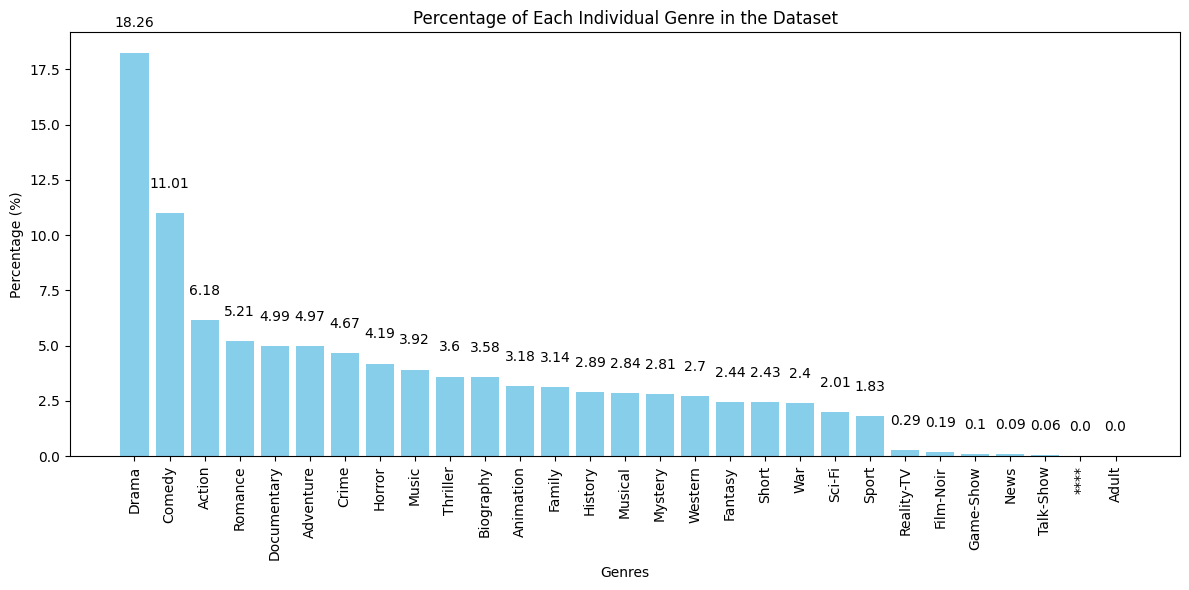

In [47]:
import matplotlib.pyplot as plt

# Combine all genres into a single string and split them
all_genres = ','.join(merged_data['Genre'].explode().dropna())
split_genres = [genre.strip() for genre in all_genres.split(',')]

# Get the frequency of each individual genre
genre_counts = pd.Series(split_genres).value_counts()

# Calculate the percentage of each genre
genre_percentages = (genre_counts / genre_counts.sum()) * 100

# Sort genres by count in descending order
sorted_genres = genre_percentages.sort_values(ascending=False)

# Create bar chart for individual genre distribution with numbers above bars
plt.figure(figsize=(12, 6))
bars = plt.bar(sorted_genres.index, sorted_genres, color='skyblue')
plt.title('Percentage of Each Individual Genre in the Dataset')
plt.xlabel('Genres')
plt.ylabel('Percentage (%)')
plt.xticks(rotation=90)

# Add text labels for each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval + 1, round(yval, 2), ha='center', va='bottom')

plt.tight_layout()
plt.show()



In [48]:
merged_data.shape

(70921, 11)

In [49]:
# Count the occurrences of 'Reality-TV' in the 'Genre' column
reality_tv_count = (merged_data['Genre'].apply(lambda x: 'Reality-TV' in x)).sum()

print(f"Number of series with 'Reality-TV' in the genre: {reality_tv_count}")


Number of series with 'Reality-TV' in the genre: 244


In [50]:
import pandas as pd
import numpy as np

# Assuming 'merged_data' is your DataFrame

# Combine all genres into a single string and split them
all_genres = ','.join(merged_data['Genre'].explode().dropna())
split_genres = [genre.strip() for genre in all_genres.split(',')]

# Get the frequency of each individual genre
genre_counts = pd.Series(split_genres).value_counts()

# Calculate the percentage of each genre
genre_percentages = (genre_counts / genre_counts.sum()) * 100

# Identify genres above 1.5% representation
genres_above_threshold = genre_percentages[genre_percentages >= 1.5].index.tolist()

# Filter out rows with genres above the 1.5% threshold
rows_below_threshold = merged_data[~merged_data['Genre'].apply(lambda x: any(item in genres_above_threshold for item in x))]

# Select 500 random rows per genre for genres above 1.5% representation
selected_above_threshold = []

for genre in genres_above_threshold:
    rows_genre = merged_data[merged_data['Genre'].apply(lambda x: genre in x)]
    if len(rows_genre) > 500:
        selected_rows = rows_genre.sample(n=500, random_state=42)
        selected_above_threshold.append(selected_rows)
    else:
        selected_above_threshold.append(rows_genre)

# Combine the selected rows
final_selected_above_threshold = pd.concat(selected_above_threshold)

# Displaying the shape of the final selected dataset
print("Shape of dataset with genres above 1.5% (500 rows per genre):", final_selected_above_threshold.shape)



Shape of dataset with genres above 1.5% (500 rows per genre): (5588, 11)


In [51]:
import matplotlib.pyplot as plt

# Combine all genres into a single string and split them
all_genres = ','.join(final_selected['Genre'].explode().dropna())
split_genres = [genre.strip() for genre in all_genres.split(',')]

# Get the frequency of each individual genre
genre_counts = pd.Series(split_genres).value_counts()

# Calculate the percentage of each genre
genre_percentages = (genre_counts / genre_counts.sum()) * 100

# Sort genres by count in descending order
sorted_genres = genre_percentages.sort_values(ascending=False)

# Create bar chart for individual genre distribution with numbers above bars
plt.figure(figsize=(12, 6))
bars = plt.bar(sorted_genres.index, sorted_genres, color='skyblue')
plt.title('Percentage of Each Individual Genre in the Dataset')
plt.xlabel('Genres')
plt.ylabel('Percentage (%)')
plt.xticks(rotation=90)

# Add text labels for each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval + 1, round(yval, 2), ha='center', va='bottom')

plt.tight_layout()
plt.show()


NameError: name 'final_selected' is not defined